# Demographic and Behavioral Characteristics Among HIV Incident Cases Diagnosed Since 2016 – Illinois
- This Table represents all new diagnoses with HIV regardless of the stage of the disease [HIV (non-AIDS) or AIDS], and also is referred    to as “HIV infection” or “HIV disease.”
- The Table divides the patients on different Ethics/Ethnicity and categorises them evenly
- This table contains 8 columns.
  1. Cumulative cases Diagnosed Since 2016 - Race/Ethnicity
  2. Total Cases
  3. Percent of Total Cases
  4. Case rate
  5. Total Dealths
  6. Male Cases
  7. percent of Male Cases
  8. Male Case Rate
- using selenium for webscraping I am going to extract the table data save it in a csv format.
- Perform data cleaning to remove unwanted columns
- Perform Extrapolatory Data Analysis to find and drive Insight on the data
- finally perform Visualization on the data to find and undestand the data for better storytelling

In [4]:
import csv
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.wait import WebDriverWait
plt.style.use('seaborn-v0_8-whitegrid')
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

%matplotlib inline

In [ ]:
driver = webdriver.Chrome()
driver.maximize_window
driver.get(
    url="https://dph.illinois.gov/topics-services/diseases-and-conditions/hiv-aids/hiv-surveillance/update-reports/2023/february.html")
wait = WebDriverWait(driver, 10)
Table = wait.until(EC.presence_of_element_located((By.XPATH, "(//table[@id='DataTables_Table_12'])[1]")))

# getting the number of rows
Rows = Table.find_elements(By.XPATH, ".//tbody/tr")
Rows_Count = len(Rows)
print(f"Row Count: {Rows_Count}")

data = []
for _ in Rows:
    cells = _.find_elements(By.XPATH, ".//td")
    Row = [cell.text for cell in cells]
    data.append(Row)

print()
for _ in data:
    print(_)

# saving the data on a csv format
with open("Hiv and Aids Demographics and Behavioral Characteristics.csv", "w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    if data:
        writer.writerow(['Cumulative cases Diagnosed Since 2016', 'Total Cases', 'Percent of Total Cases',
                        'Case rate', 'Total Deaths', 'Male Cases', 'Percent of Male Cases', 'Male Case Rate', 
                         'Female Cases', 'Percent Of Female Cases', 'Female Case Rate'])
        writer.writerows(data)

print()
print('Data saved to csv!')
    
time.sleep(10)
driver.quit()

In [37]:
df = pd.read_csv('February 2023 HIV Surveillance Update Report.csv')
dfCopy = df.copy()
dfCopy

,Unnamed: 0.1,Unnamed: 0,Cumulative Cases Diagnosed in 2016,Total Cases,Total Cases %,Case Rate,Total Deaths,Male Cases,Male Cases %,Male Case Rate,Female Cases,Female Cases %,Female Case Rate
0,0,0,Total,9508,100.00,10.30,195,7864,100.00,17.36,1644,100.00,3.50
1,1,1,"White, non-Hispanic",1981,20.84,3.41,63,1726,21.95,6.06,255,15.51,0.86
2,2,2,"Black, non-Hispanic",4510,47.43,34.32,98,3456,43.95,56.18,1054,64.11,15.08
3,3,3,"Hispanic, all races",2233,23.49,14.83,25,2038,25.92,26.22,195,11.86,2.68
4,4,4,Other,601,6.32,10.16,8,489,6.22,17.07,112,6.81,3.67
5,5,5,Unknown,183,1.92,10.16,1,155,1.97,17.07,28,1.70,3.67


# Extrapolatory Data Analysis 
- we are performing EDA on the data to remove, identify outliers on the data.
- Find insight on the data by performing data distribution.
- Cleaning, removing duplicates and handling null values
- Lastly performing visualization on the data to
  1) Get a better storytelling
  2) Find correlation on the numerical data

In [51]:
# No of rows, columns
rows, columns = dfCopy.shape
print(f"Rows: {rows}, Columns: {columns}")

Rows: 6, Columns: 11


In [50]:
dfCopy.describe()

,Total Cases,Total Cases %,Case Rate,Total Deaths,Male Cases,Male Cases %,Male Case Rate,Female Cases,Female Cases %,Female Case Rate
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,3169.333333,33.333333,13.863333,65.000000,2621.333333,33.335000,23.326667,548.000000,33.331667,4.910000
std,3457.729351,36.366613,10.665913,73.400272,2826.792081,35.945757,17.319027,652.411833,39.685206,5.096422
min,183.000000,1.920000,3.410000,1.000000,155.000000,1.970000,6.060000,28.000000,1.700000,0.860000
25%,946.000000,9.950000,10.160000,12.250000,798.250000,10.152500,17.070000,132.750000,8.072500,2.885000
50%,2107.000000,22.165000,10.230000,44.000000,1882.000000,23.935000,17.215000,225.000000,13.685000,3.585000
75%,3940.750000,41.445000,13.697500,89.250000,3101.500000,39.442500,24.005000,854.250000,51.960000,3.670000
max,9508.000000,100.000000,34.320000,195.000000,7864.000000,100.000000,56.180000,1644.000000,100.000000,15.080000


In [57]:
dfCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cumulative Cases Diagnosed in 2016  6 non-null      object 
 1   Total Cases                         6 non-null      int64  
 2   Total Cases %                       6 non-null      float64
 3   Case Rate                           6 non-null      float64
 4   Total Deaths                        6 non-null      int64  
 5   Male Cases                          6 non-null      int64  
 6   Male Cases %                        6 non-null      float64
 7   Male Case Rate                      6 non-null      float64
 8   Female Cases                        6 non-null      int64  
 9   Female Cases %                      6 non-null      float64
 10  Female Case Rate                    6 non-null      float64
dtypes: float64(6), int64(4), object(1)
memory usage: 

In [53]:
# getting null values
dfCopy.isna().sum()

Cumulative Cases Diagnosed in 2016    0
Total Cases                           0
Total Cases %                         0
Case Rate                             0
Total Deaths                          0
Male Cases                            0
Male Cases %                          0
Male Case Rate                        0
Female Cases                          0
Female Cases %                        0
Female Case Rate                      0
dtype: int64

In [ ]:
# converting object columns to float
dfCopy['Percent of Female Cases'] = [float(str(i).replace("%","")) for i in dfCopy['Percent of Female Cases']]
# dfCopy['Percent of Total Cases'] = [float(str(i).replace("%","")) for i in dfCopy['Percent of Total Cases']]
# dfCopy['Percent of Male Cases'] = [float(str(x).replace("%","")) for x in dfCopy['Percent of Male Cases']]

In [27]:
# fillling the null values
dfCopy['Case Rate'] = dfCopy['Case Rate'].fillna(dfCopy['Case Rate'].ffill())
# dfCopy['Male Case Rate'] = dfCopy['Male Case Rate'].fillna(dfCopy['Male Case Rate'].ffill())
# dfCopy['Female Case Rate'] = dfCopy['Female Case Rate'].fillna(dfCopy['Female Case Rate'].ffill())

In [55]:
# renaming the columns
dfCopy  = dfCopy.rename(
    columns={"Cumulative Cases Diagnosed 2016":"Cumulative Cases Diagnosed in 2016",
            "Percent of Total Cases":"Total Cases %","Percent of Male Cases":"Male Cases %",
            "Percent of Female Cases":"Female Cases %"})

In [56]:
dfCopy

,Cumulative Cases Diagnosed in 2016,Total Cases,Total Cases %,Case Rate,Total Deaths,Male Cases,Male Cases %,Male Case Rate,Female Cases,Female Cases %,Female Case Rate
0,Total,9508,100.00,10.30,195,7864,100.00,17.36,1644,100.00,3.50
1,"White, non-Hispanic",1981,20.84,3.41,63,1726,21.95,6.06,255,15.51,0.86
2,"Black, non-Hispanic",4510,47.43,34.32,98,3456,43.95,56.18,1054,64.11,15.08
3,"Hispanic, all races",2233,23.49,14.83,25,2038,25.92,26.22,195,11.86,2.68
4,Other,601,6.32,10.16,8,489,6.22,17.07,112,6.81,3.67
5,Unknown,183,1.92,10.16,1,155,1.97,17.07,28,1.70,3.67


In [58]:
# checking for duplicates on each column
dfCopy.loc[dfCopy.duplicated(subset=['Total Cases %'])]

,Cumulative Cases Diagnosed in 2016,Total Cases,Total Cases %,Case Rate,Total Deaths,Male Cases,Male Cases %,Male Case Rate,Female Cases,Female Cases %,Female Case Rate


In [23]:
# saving file to the csv 
dfCopy.to_csv('February 2023 HIV Surveillance Update Report.csv')

# Visualization
1) we are plotting and getting a better insight on the data
2) find the correlation between the numerical values
3) plot to see trend on the dataset

In [59]:
relation = round(dfCopy[dfCopy.columns[1:]].corr(),2)

In [60]:
relation

,Total Cases,Total Cases %,Case Rate,Total Deaths,Male Cases,Male Cases %,Male Case Rate,Female Cases,Female Cases %,Female Case Rate
Total Cases,1.00,1.00,0.20,0.98,1.00,1.00,0.20,0.97,0.97,0.21
Total Cases %,1.00,1.00,0.20,0.98,1.00,1.00,0.20,0.97,0.97,0.21
Case Rate,0.20,0.20,1.00,0.16,0.16,0.16,1.00,0.37,0.37,0.97
Total Deaths,0.98,0.98,0.16,1.00,0.98,0.98,0.15,0.97,0.97,0.21
Male Cases,1.00,1.00,0.16,0.98,1.00,1.00,0.16,0.96,0.96,0.16
Male Cases %,1.00,1.00,0.16,0.98,1.00,1.00,0.16,0.96,0.96,0.16
Male Case Rate,0.20,0.20,1.00,0.15,0.16,0.16,1.00,0.36,0.36,0.96
Female Cases,0.97,0.97,0.37,0.97,0.96,0.96,0.36,1.00,1.00,0.41
Female Cases %,0.97,0.97,0.37,0.97,0.96,0.96,0.36,1.00,1.00,0.41
Female Case Rate,0.21,0.21,0.97,0.21,0.16,0.16,0.96,0.41,0.41,1.00


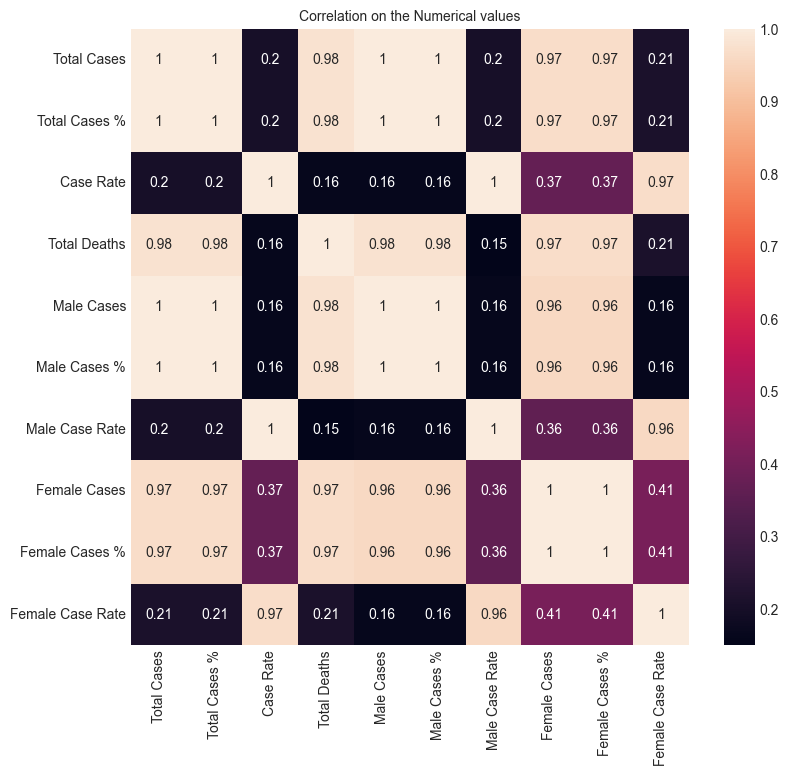

In [61]:
# using heatmap to plot the correlation
plt.subplots(figsize=(9,8))
fig = sns.heatmap(data=relation, annot=True)
fig.set_title(label="Correlation on the Numerical values", fontsize=10)
fig.tick_params(axis='x', labelsize=10)
fig.tick_params(axis='y', labelsize=10)
plt.show()

In [62]:
group = dfCopy.query('`Cumulative Cases Diagnosed in 2016` != "Total"') \
        .groupby('Cumulative Cases Diagnosed in 2016')[dfCopy.columns[1:]].agg('sum')

In [63]:
# A dataframe withiout the total row
NoTotal = dfCopy.query('`Cumulative Cases Diagnosed in 2016` != "Total"')

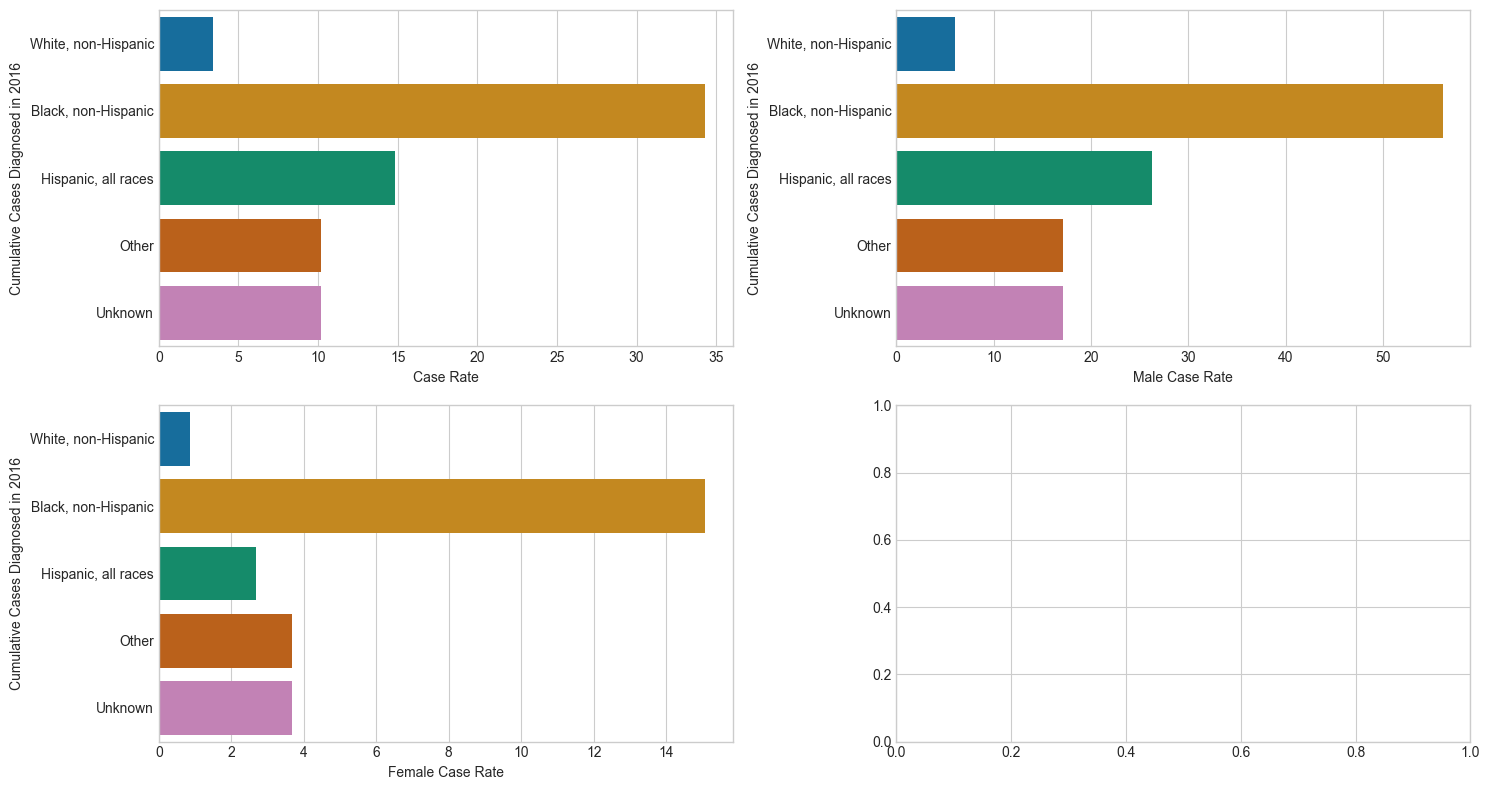

In [75]:
# line chart to show Both Male and Female Cases of the Race/Ethnicity 
class Subplots:
    def __init__(self,data):
        self.data = data
        
    def CreatSubPlots(self):
        """This function creates subplots of all the Rates on the data set"""
        fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

        self.create_subplots(axes[0,0], 'Case Rate')
        self.create_subplots(axes[0,1], 'Male Case Rate')
        self.create_subplots(axes[1,0], 'Female Case Rate')


        plt.tight_layout()
        plt.show()
    def create_subplots(self, ax, rate):
            sns.barplot(
                data=self.data,
                x=self.data[rate],
                y='Cumulative Cases Diagnosed in 2016',
                orient = 'h',
                palette='colorblind',
                hue = 'Cumulative Cases Diagnosed in 2016',
                legend = False,
                ax=ax
            )
        

if __name__ == "__main__":
     plot = Subplots(NoTotal)
     plot.CreatSubPlots()

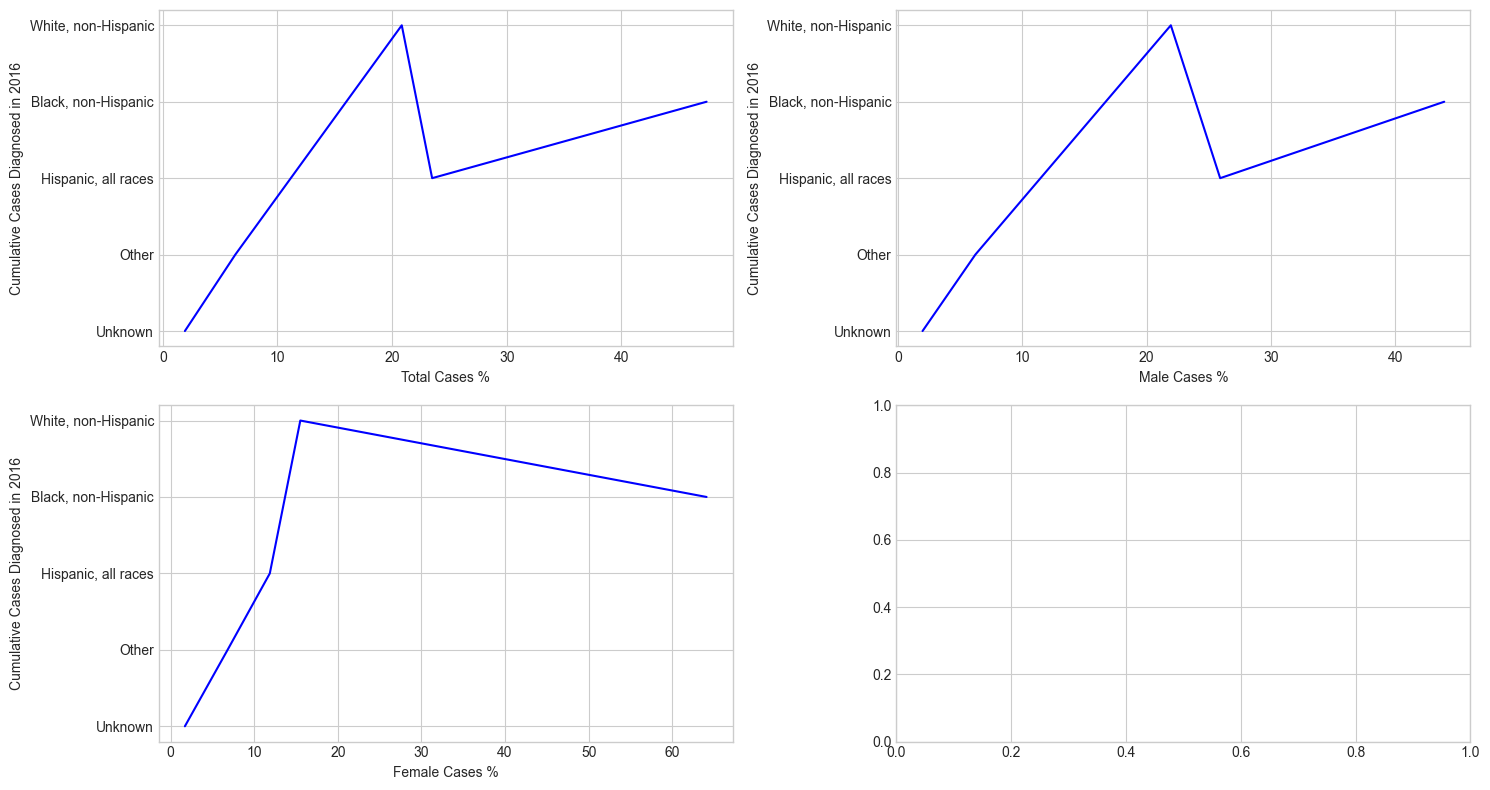

In [69]:
# line chart
class linesubplots:
    def __init__(self, data):
        self.data = data

    # Creating subplots
    def createLinePlots(self):
        # Create subplots using plt.subplots()
        fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

        # Call the Line_plots method for each subplot
        self.Line_plots(axes[0, 0], 'Total Cases %')
        self.Line_plots(axes[0, 1], 'Male Cases %')
        self.Line_plots(axes[1, 0], 'Female Cases %')

        # Adjust layout and display the plot
        plt.tight_layout()
        plt.show()

    def Line_plots(self, ax, percentage):
        sns.lineplot(
            data=self.data,
            x=self.data[percentage],
            y='Cumulative Cases Diagnosed in 2016',
            markers='o',
            color='b',
            ax=ax
        )

if __name__ == "__main__":
    plat = linesubplots(NoTotal)
    plat.createLinePlots()

In [ ]:
dfCopy.drop(columns='Unnamed: 0.1', inplace=True)

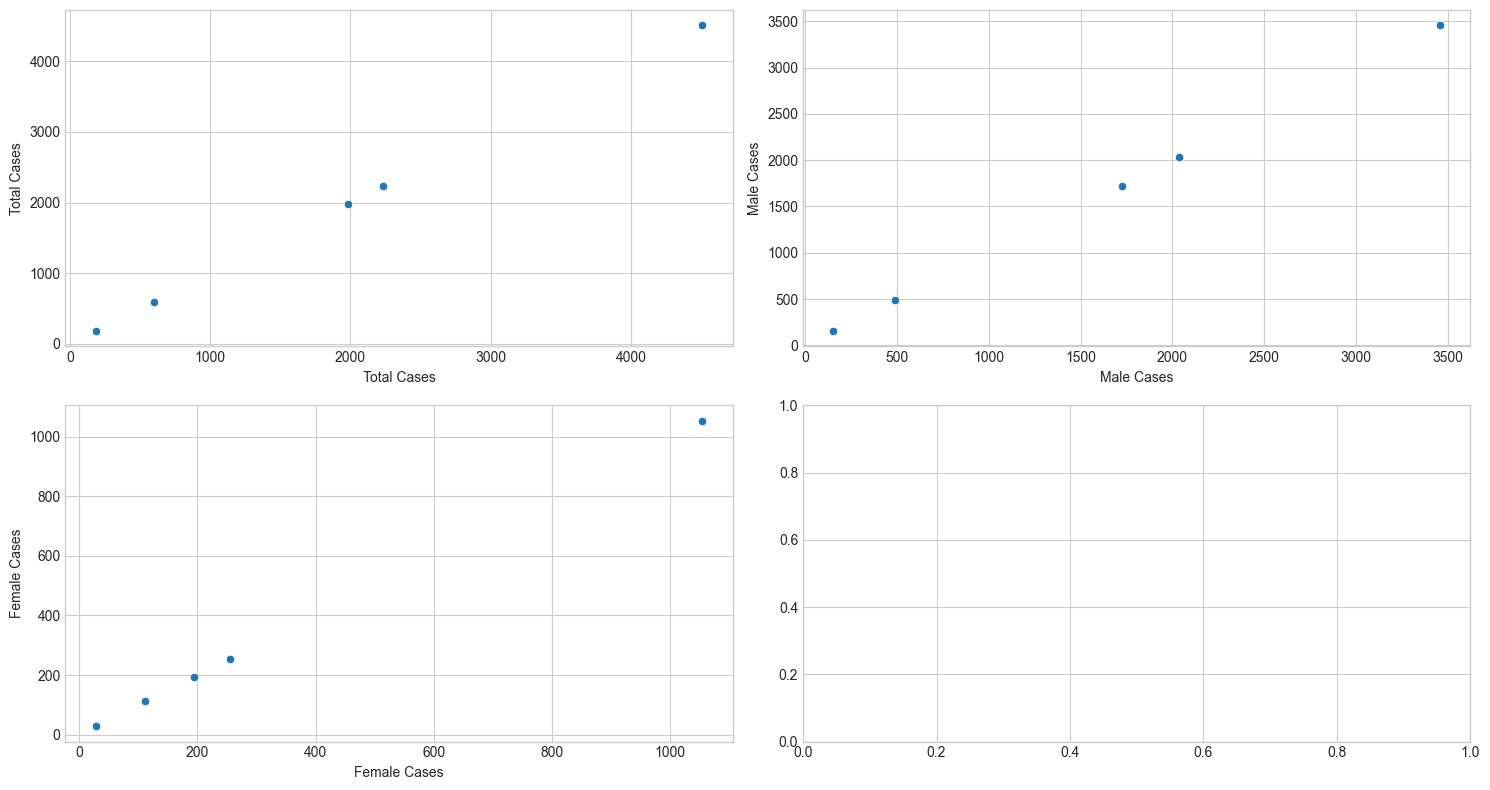

In [93]:
# scatter plot for the Cases
class ScatterPlots:
    def __init__(self, data):
        self.data = data

    def CreateScatterPlots(self):
        fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

        self.scatterchart(axes[0,0], 'Total Cases')
        self.scatterchart(axes[0,1], 'Male Cases')
        self.scatterchart(axes[1,0], 'Female Cases')

        plt.tight_layout()
        plt.show()

    def scatterchart(self, ax, cases):
        sns.scatterplot(
            data=self.data,
            x = self.data[cases],
            y = self.data[cases],
            markers=True,
            ax=ax 
        )

if __name__ == "__main__":
    ploating = ScatterPlots(NoTotal)
    ploating.CreateScatterPlots()

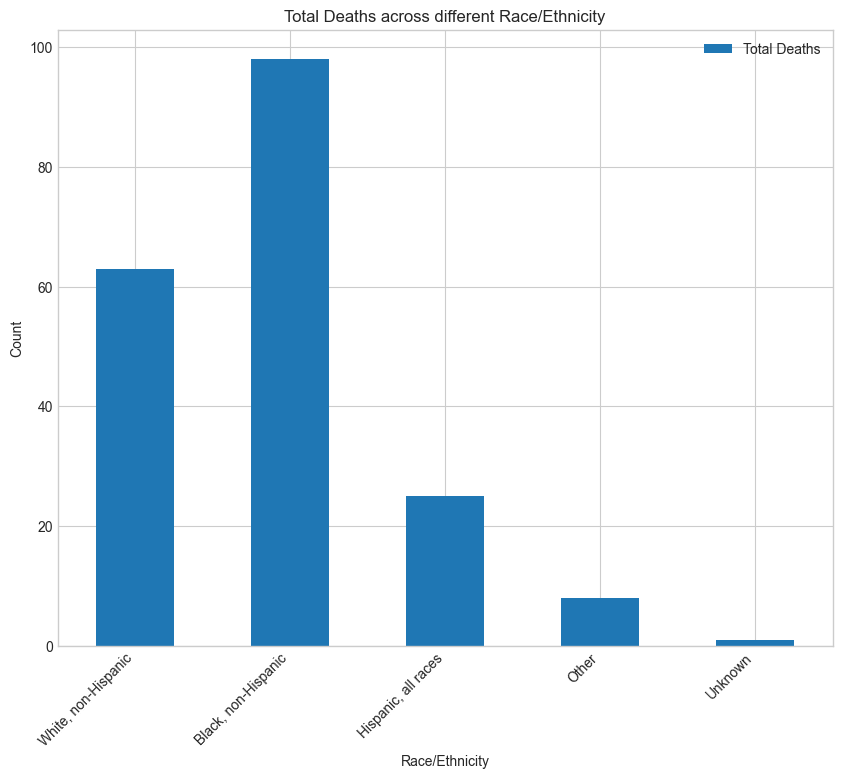

In [89]:
# a barchat for the Total Cases Deaths
fig = dfCopy.query('`Cumulative Cases Diagnosed in 2016` != "Total"').plot(kind='bar',
                 x='Cumulative Cases Diagnosed in 2016',
                 y='Total Deaths', figsize=(10,8),
                title='Total Deaths across different Race/Ethnicity')
fig.set_ylabel('Count', fontsize=10)
fig.set_xlabel('Race/Ethnicity', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.show()

In [94]:
NoTotal

,Cumulative Cases Diagnosed in 2016,Total Cases,Total Cases %,Case Rate,Total Deaths,Male Cases,Male Cases %,Male Case Rate,Female Cases,Female Cases %,Female Case Rate
1,"White, non-Hispanic",1981,20.84,3.41,63,1726,21.95,6.06,255,15.51,0.86
2,"Black, non-Hispanic",4510,47.43,34.32,98,3456,43.95,56.18,1054,64.11,15.08
3,"Hispanic, all races",2233,23.49,14.83,25,2038,25.92,26.22,195,11.86,2.68
4,Other,601,6.32,10.16,8,489,6.22,17.07,112,6.81,3.67
5,Unknown,183,1.92,10.16,1,155,1.97,17.07,28,1.70,3.67
